## IMPORTANTO BIBLIOTECAS

In [1]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
# from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing

from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import os

In [2]:
percentege_test_size = 0.2
undersampling_size = 1400 # -1 para não fazer undersampling

# fig preprocessing
largura = 100
altura = 100
modo_de_cor = 'rgb' # rgb, grayscale, rgba
# fig preprocessing

# directory = '../../dados classificacao imagens/animais-kaggle/'
# directory = '../../dados classificacao imagens/dataset-documentos-full/'
# directory = '../../dados classificacao imagens/pneumonia/'
# directory = '../../dados classificacao imagens/gatos-patos-caes-rapozas-coelhos/treino/'
# directory = '../../dados classificacao imagens/dataset-documentos/'
directory = '../../dados classificacao imagens/star-wars/'
# directory = '/home/carlos/Downloads/dados-docs/'

### CARREGANDO DATASET

In [3]:
targets = [x[0].replace(directory,'') for x in os.walk(directory)]

targets = targets[1:len(targets)] # exclui o primeiro da lista pq é o próprio diretório

dados = []

for classe in targets:
    imagens = os.listdir(directory+classe)
    i = 0
    for img in imagens:
        i+=1
        
        if (not '.txt' in img) and (not 'segmentation' in img) and (not 'desktop.ini' in img):
            dados.append([directory+classe+'/'+img,classe])
        
        if(i == undersampling_size and undersampling_size != -1):
            break

dados = np.array(dados)

np.random.shuffle(dados)
            
df_dados = pd.DataFrame(dados,columns=['image','target'])

df_dados

,image,target
0,../../dados classificacao imagens/star-wars/Ke...,Kenobi
1,../../dados classificacao imagens/star-wars/Sa...,Saw Gerrera
2,../../dados classificacao imagens/star-wars/Po...,Poe Dameron
3,../../dados classificacao imagens/star-wars/We...,Wedge Antilles
4,../../dados classificacao imagens/star-wars/Ob...,Obi-Wan
...,...,...
4723,../../dados classificacao imagens/star-wars/Ja...,Jabba the Hutt
4724,../../dados classificacao imagens/star-wars/La...,Lando Calrissian
4725,../../dados classificacao imagens/star-wars/Ha...,Han Solo
4726,../../dados classificacao imagens/star-wars/Re...,Rey


## PREPARANDO DADOS

In [4]:
def embedding(img_path,largura,altura,modo_de_cor):
    
    img = image.load_img(img_path, target_size=(largura, altura),color_mode= modo_de_cor)
    embed = image.img_to_array(img)
    
    shape_entrada = largura*altura*1

    if(modo_de_cor == 'rgb'):
        shape_entrada = largura*altura*3

    if(modo_de_cor == 'rgba'):
        shape_entrada = largura*altura*4
    
    return embed.reshape(shape_entrada)

In [5]:
target = df_dados['target'].array

array_features = []
for x in dados:
    array_features.append(embedding(x[0],largura,altura,modo_de_cor))

scaler = preprocessing.StandardScaler()

array_features = scaler.fit_transform(array_features)

df_features = pd.DataFrame(array_features)

df_features

,0,1,2,3,4,5,6,7,8,9,...,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,-0.879712,-0.838887,-0.791126,-0.820001,-0.779700,-0.751943,-0.841060,-0.792107,-0.797184,-0.841911,...,-0.005944,-0.521528,-0.327359,0.134804,-0.541179,-0.301493,-0.096195,-0.537100,-0.437123,-0.130464
1,-0.393949,-0.549749,-0.636507,-0.488946,-0.645985,-0.729792,-0.553502,-0.713998,-0.797184,-0.476056,...,-0.921038,-0.976407,-0.926785,-0.910952,-0.972726,-0.922083,-0.905672,-0.953764,-0.906318,-0.891746
2,0.566537,1.274042,1.274135,0.559395,1.270597,1.274832,0.563547,1.272196,1.277106,0.566076,...,0.631147,1.434451,1.032878,0.622823,1.457562,1.054610,0.620770,1.433607,1.039127,0.607748
3,-0.979073,-1.005697,-0.934700,-0.985528,-1.013702,-0.940222,-0.984838,-0.992958,-0.908108,-1.008209,...,1.499907,1.207011,1.401755,1.447809,1.321285,1.502814,1.522759,1.073249,0.924689,0.976855
4,-0.228348,-0.205008,-0.006989,-0.312383,-0.289412,-0.087426,-0.277005,-0.267662,-0.020712,-0.298672,...,0.503729,0.342742,0.398869,0.518248,0.333270,0.388051,0.482003,0.296228,0.352499,0.434730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4723,-0.581630,-0.549749,-0.459800,-0.566192,-0.445413,-0.408609,-0.420784,-0.312296,-0.242561,-0.187807,...,-0.944205,-0.987779,-0.984422,-0.980669,-0.927300,-0.979545,-0.998184,-0.593406,-0.746105,-0.891746
4724,-0.625791,-0.571990,-0.603375,-0.654473,-0.612557,-0.652265,-0.675161,-0.624731,-0.652982,-0.764306,...,-0.782036,0.285882,-0.108338,-0.771518,0.367340,-0.025676,-0.720649,0.431362,0.043517,-0.672589
4725,-0.780352,-0.761042,-0.780081,-0.875177,-0.857701,-0.873771,-0.929539,-0.914849,-0.930293,-0.852998,...,-0.226030,-0.350948,-0.246667,-0.213781,-0.325406,-0.221046,-0.188707,-0.379443,-0.311241,-0.268879
4726,-0.769312,-0.605352,-0.647551,-0.753790,-0.590271,-0.630115,-0.730461,-0.568939,-0.608612,-0.731046,...,-0.005944,-0.635248,0.029991,-0.039489,-0.666101,-0.002691,-0.073067,-0.627189,-0.036590,-0.107395


## REDUZINDO A DIMENSIONALIDADE

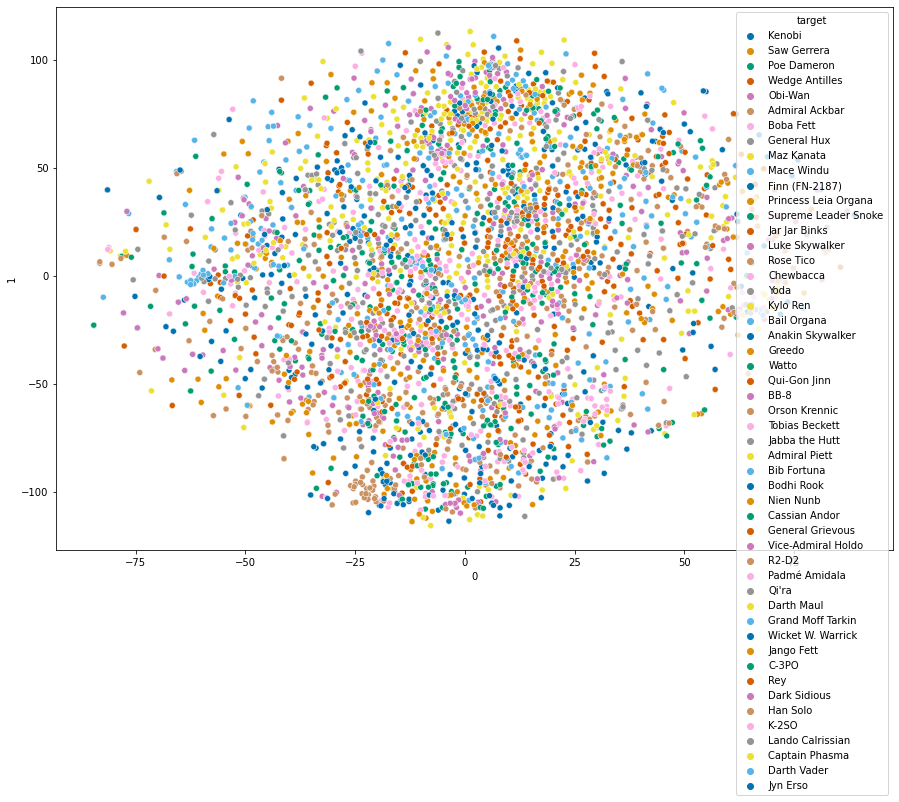

In [6]:
model = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15)
array_red = model.fit_transform(df_features) 

df_tsne = pd.DataFrame(array_red)

df_tsne['target'] = target

plt.rcParams['figure.figsize'] = [15, 10]

sns.scatterplot(data=df_tsne, x=df_tsne[0], y=df_tsne[1], hue=df_tsne['target'], palette="colorblind")

plt.show()

## TREINANDO E VALIDANDO O MODELO

In [7]:
def getModel():
    return RandomForestClassifier(n_jobs=20)
    # return LogisticRegression(n_jobs=20, solver='sag', multi_class='ovr')
    # return KNeighborsClassifier(n_neighbors=3,n_jobs=20)
    # return XGBClassifier()
    # return SGDClassifier(n_jobs=20,early_stopping=True,validation_fraction=0.05)

In [8]:
X_treino, X_teste, y_treino, y_teste = train_test_split(df_features.values,target,test_size=percentege_test_size)

model = getModel().fit(X_treino, y_treino)

score = model.score(X_teste, y_teste)

score

0.5010570824524313

## VALIDANDO DE FORMA MAIS ELABORADA

In [9]:
scores = cross_val_score(getModel(),df_features.values,target,cv=10)

np.mean(scores)

KeyboardInterrupt: 

## VISUALIZANDO A MATRIZ DE CONFUSÃO

In [ ]:
predicoes = cross_val_predict(getModel(),df_features.values,target,cv=10)

cm = confusion_matrix(target, predicoes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()